In [1]:
# coding: utf-8
#!/usr/bin/python2
import nltk
import os
import codecs
import argparse
import numpy as np
import gensim # In case you have difficulties installing gensim, you need to consider installing conda.
from gensim.models.callbacks import CallbackAny2Vec
import pickle as pickle




In [33]:
# arguments setting 

lcode = "vi"
vector_size = 300
window_size = 5
vocab_size = 40000
num_negative = 5
epochs = 5

        
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        self.losses.append(loss_now)
        
        
def get_min_count(sents):
    '''
    Args:
      sents: A list of lists. E.g., [["I", "am", "a", "boy", "."], ["You", "are", "a", "girl", "."]]
     
    Returns:
      min_count: A uint. Should be set as the parameter value of word2vec `min_count`.   
    '''
    global vocab_size
    from itertools import chain
     
    fdist = nltk.FreqDist(chain.from_iterable(sents))
    min_count = fdist.most_common(vocab_size)[-1][1] # the count of the the top-kth word
    
    return min_count

def make_wordvectors():
    global lcode
    
     
    print ("Making sentences as list...")
    sents = []
    with codecs.open('data/corpus/vi-wiki.txt', 'r', 'utf-8') as fin:
        while 1:
            line = fin.readline()
            if not line: break
             
            words = line.split()
            sents.append(words)

    print ("Making word vectors...")   
    min_count = get_min_count(sents)

    model = gensim.models.Word2Vec(sents, size=vector_size, min_count=min_count,
                                   negative=num_negative, 
                                   window=window_size,
                                   callbacks=[callback()],
                                   compute_loss=True,
                                   iter=epochs)

    # Save vector to file
    model.wv.save_word2vec_format('data/vectors/{}-{}-{}-{}-{}-wiki.vec'.format(lcode, vector_size, window_size, vocab_size, num_negative), binary=False)
    
    # Save to file

    with codecs.open('data/vectors/{}-{}-{}-{}-{}-wiki.tsv'.format(lcode, vector_size, window_size, vocab_size, num_negative), 'w', 'utf-8') as fout:
        for i, word in enumerate(model.wv.index2word):
            fout.write(u"{}{}\n".format(word.encode('utf8').decode('utf8'),
                                              np.array_str(model[word])[1:-1]
                                              ))



In [11]:
#if __name__ == "__main__":
    #make_wordvectors()
    
    #print ("Done")

In [3]:
global lcode
print ("Making sentences as list...")
sents = []
with codecs.open('data/corpus/corpus-split-2.txt', 'r', 'utf-8-sig') as fin:
    while 1:
        line = fin.readline()
        if not line: break

        words = line.split()
        sents.append(words)
        
print ("Done making sentence list")

Making sentences as list...
Done making sentence list


In [29]:
min_count = get_min_count(sents)
print ("Done getting min_count ")

Done getting min_count


In [30]:
print(min_count)

813


In [34]:

print ("Making word vectors...")   

call_back = callback()

model = gensim.models.Word2Vec(sents, size=vector_size, min_count=300,
                               negative=num_negative, 
                               window=window_size,
                               callbacks=[call_back],
                               compute_loss=True,
                               iter=epochs)

# Save vector to file
model.wv.save_word2vec_format('data/vectors/{}-{}-{}-{}-{}-test.vec'.format(lcode, vector_size, window_size, vocab_size, num_negative), binary=False)

# Save to file
with codecs.open('data/vectors/{}-{}-{}-{}-{}-test.tsv'.format(lcode, vector_size, window_size, vocab_size, num_negative), 'w', 'utf-8') as fout:
    for i, word in enumerate(model.wv.index2word):
        fout.write(u"{}{}\n".format(word.encode('utf8').decode('utf8'),
                                          np.array_str(model[word])[1:-1]
                                          ))
print ("Done.")


Making word vectors...
Loss after epoch 0: 90459160.0
Loss after epoch 1: 43758568.0
Loss after epoch 2: 0.0
Loss after epoch 3: 0.0
Loss after epoch 4: 0.0


C:\Users\lego2\anaconda3\envs\python36-clone-GUI\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Done.


In [5]:
print(call_back.losses)

[92968680.0, 41249048.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [10]:

y=np.array([38978128.0,25219024.0,8884136.0,6655376.0,6398920.0,6074936.0,5633144.0,5013496.0,4267192.0,3323312.0])


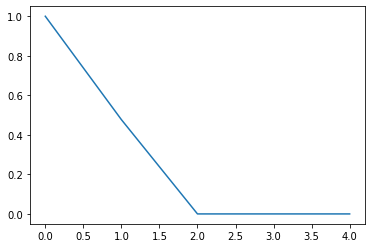

In [32]:
import matplotlib.pyplot as plt
norm = [float(i)/max(call_back.losses) for i in call_back.losses]
plt.plot(norm)

In [28]:
model.most_similar('mẹ')

C:\Users\lego2\anaconda3\envs\python36-clone-GUI\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mẹ,', 0.8252959251403809),
 ('mẹ.', 0.7252343893051147),
 ('Mẹ', 0.6655176281929016),
 ('dượng', 0.64325350522995),
 ('vợ', 0.5996155738830566),
 ('cháu', 0.5902571082115173),
 ('con,', 0.5804028511047363),
 ('dì', 0.5673509836196899),
 ('đẻ', 0.5526345372200012),
 ('mẹ:', 0.5435689687728882)]

In [31]:
vec = (model.wv['mẹ'] - model.wv['nữ'] )
model.wv.most_similar([vec])


[('mẹ', 0.6152399182319641),
 ('mẹ,', 0.5310037136077881),
 ('phụ', 0.42369943857192993),
 ('dượng', 0.40940457582473755),
 ('cháu', 0.38958561420440674),
 ('mẹ.', 0.38572168350219727),
 ('Mẹ', 0.38554081320762634),
 ('dì', 0.365641713142395),
 ('mẹ:', 0.36028555035591125),
 ('đẻ', 0.3540491759777069)]